In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os

# AT01 & AT02

In [12]:
path = r'data' # use your path
all_files = glob.glob(os.path.join(path , '*.csv'))

print(all_files)

df_li = []

for filename in all_files:
    single_df = pd.read_csv(filename, index_col=None, header=0, sep='|')
    df_li.append(single_df)

df = pd.concat(df_li, axis=0, ignore_index=True)

df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-,15634602,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,-,15647311,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,-,15619304,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,-,15701354,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,-,15737888,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,-,15606229,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,-,15569892,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,-,15584532,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,-,15682355,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1


# AT03

In [21]:
df.loc[(df['num_kids'].astype(str) != '-')]
# -> num_kids is always '-'

df = df.drop_duplicates()

df.describe(include="all")

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000,1.000000e+04,10000.00000,10000,9999,10000.000000,10000.000000,10000.000000,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000
unique,1,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,-,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10000,NaN,NaN,5014,5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.569094e+07,650.51820,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.705512,0.515100,100090.239881,0.203700
std,NaN,7.193619e+04,97.20821,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.455835,0.499797,57510.492818,0.402769
min,NaN,1.556570e+07,-98.00000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,NaN,1.562853e+07,584.00000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,NaN,1.569074e+07,652.00000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,NaN,1.575323e+07,718.00000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000


# AT04

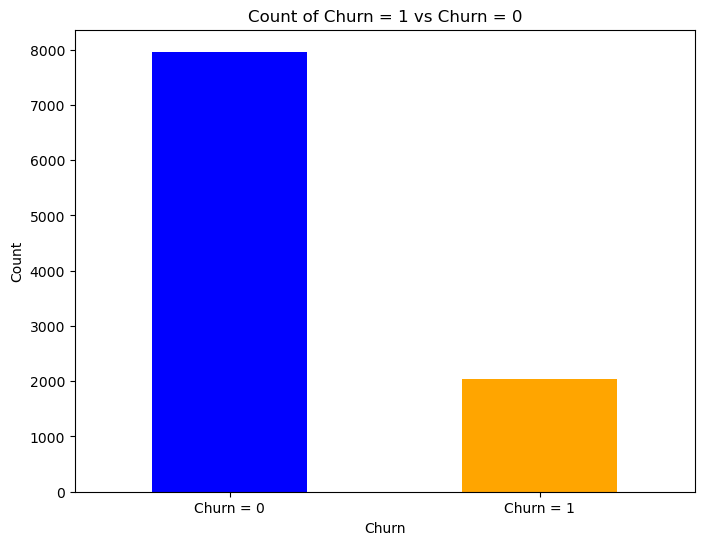

In [14]:

churn_counts = df['churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Churn = 1 vs Churn = 0')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Churn = 0', 'Churn = 1'], rotation=0)
plt.show()

# AT05

In [15]:
df.duplicated().sum()

0

# AT06

In [16]:
df_filtered = df[df['gender'] == 'Male']
df_filtered = df_filtered[df_filtered['age'] > 50]

df_filtered

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
16,-,15737452,653,Germany,Male,58,1,132602.88,1,1.0,0,5097.67,1
59,-,15804771,614,France,Male,51,4,40685.92,1,1.0,1,46775.28,0
63,-,15751208,684,Spain,Male,56,8,78707.16,1,1.0,1,99398.36,0
70,-,15703793,738,Germany,Male,58,2,133745.44,4,1.0,0,28373.86,1
76,-,15614049,664,France,Male,55,8,0.00,2,1.0,1,139161.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,-,15669414,486,Germany,Male,62,9,118356.89,2,1.0,0,168034.83,1
9915,-,15773338,739,France,Male,58,2,101579.28,1,1.0,1,72168.53,0
9916,-,15784042,624,France,Male,55,7,118793.60,1,1.0,1,95022.02,1
9923,-,15755731,635,Germany,Male,53,8,117005.55,1,0.0,1,123646.57,1


# AT07

In [17]:
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

print("Male Age Mean: ", df_male['age'].mean())
print("Female Age Mean: ", df_female['age'].mean())

Male Age Mean:  38.65455879655109
Female Age Mean:  39.23858875413451


# AT08

In [18]:
highest_balance = df.sort_values(by='balance', ascending=False).head(1).reset_index(drop=True)

print(highest_balance['credit_score'].values[0])

highest_balance

655


,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-,15757408,655,Spain,Male,38,3,250898.09,3,0.0,1,81054.0,1
